In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
crime = pd.read_csv('SouthAfricaCrimeStats_v2.csv')
crime.head(15)

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
5,North West,Rustenburg,All theft not mentioned elsewhere,4239,4173,3398,3388,2737,2117,2139,1914,1897,1868,1862
6,Kwazulu/Natal,Durban Central,All theft not mentioned elsewhere,4162,4529,3499,3353,3183,2933,3219,3418,3390,2872,2865
7,Gauteng,Brooklyn,All theft not mentioned elsewhere,3931,3583,2878,2568,2415,2162,2050,1883,2442,2200,2107
8,Gauteng,Booysens,All theft not mentioned elsewhere,3681,3277,2849,2603,2580,3107,2568,1339,1290,1039,943
9,Gauteng,Hillbrow,All theft not mentioned elsewhere,3489,2914,3093,2706,2250,2298,2051,1835,1610,1607,1618


In [26]:
crime.groupby(['Province']).sum()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [172]:
a=crime.set_index(['Province'])
a

,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,,,
Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401


In [178]:
a.sort_index()

,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,,,
Eastern Cape,Rietbron,Burglary at non-residential premises,0,0,0,3,1,1,0,2,0,2,0
Eastern Cape,Queenstown,Bank robbery,0,0,0,0,0,0,0,0,0,0,0
Eastern Cape,Rhodes,Bank robbery,0,0,0,0,0,0,0,0,0,0,0
Eastern Cape,Rhodes,Burglary at non-residential premises,0,0,0,0,0,0,0,0,0,0,0
Eastern Cape,Rhodes,Carjacking,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Cape,Prince Alfred Hamlet,Murder,4,13,15,20,17,18,12,8,14,16,17
Western Cape,Groot Brakrivier,Common robbery,4,3,4,6,9,7,10,7,8,15,17
Western Cape,Villiersdorp,Common robbery,4,3,5,7,4,9,10,17,10,13,16


In [ ]:
a.

In [121]:
row_g = ['Gauteng']
a.loc[row_g].sum()

Station      Jhb CentralPretoria CentralBrooklynBooysensHil...
Category     All theft not mentioned elsewhereAll theft not...
2005-2006                                               654817
2006-2007                                               639635
2007-2008                                               615618
2008-2009                                               638186
2009-2010                                               640074
2010-2011                                               609305
2011-2012                                               577959
2012-2013                                               584315
2013-2014                                               636195
2014-2015                                               637332
2015-2016                                               622218
dtype: object

In [177]:
b=a.loc[row_g].sum()
c=b.drop('Category')
d=c.drop('Station')
d

2005-2006    654817
2006-2007    639635
2007-2008    615618
2008-2009    638186
2009-2010    640074
2010-2011    609305
2011-2012    577959
2012-2013    584315
2013-2014    636195
2014-2015    637332
2015-2016    622218
dtype: object

In [7]:
crime.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


In [171]:
crime.groupby(['Province']).sum()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [4]:
WC = crime.groupby('Province').sum().iloc[8:9].unstack()
WC

           Province    
2005-2006  Western Cape    381825
2006-2007  Western Cape    396712
2007-2008  Western Cape    395281
2008-2009  Western Cape    398240
2009-2010  Western Cape    417619
2010-2011  Western Cape    426850
2011-2012  Western Cape    447238
2012-2013  Western Cape    465994
2013-2014  Western Cape    479022
2014-2015  Western Cape    492963
2015-2016  Western Cape    490383
dtype: int64

In [151]:
WC2 = WC.values.tolist()
WC2

[381825,
 396712,
 395281,
 398240,
 417619,
 426850,
 447238,
 465994,
 479022,
 492963,
 490383]

In [152]:
tuple(WC2)

(381825,
 396712,
 395281,
 398240,
 417619,
 426850,
 447238,
 465994,
 479022,
 492963,
 490383)

In [153]:
dates = ['2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016']

In [154]:
zipped_WC = zip(WC2, dates)

In [108]:
list=WC.tolist()
list

[381825,
 396712,
 395281,
 398240,
 417619,
 426850,
 447238,
 465994,
 479022,
 492963,
 490383]

(array([1., 3., 0., 1., 1., 1., 0., 1., 1., 2.]),
 array([381825. , 392938.8, 404052.6, 415166.4, 426280.2, 437394. ,
        448507.8, 459621.6, 470735.4, 481849.2, 492963. ]),
 <BarContainer object of 10 artists>)

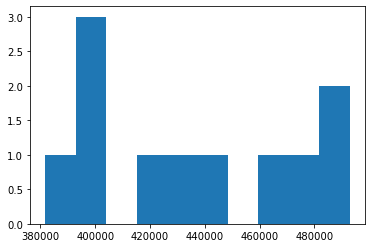

In [161]:
plt.hist(list)

ValueError: The 'color' keyword argument must have one color per dataset, but 11 datasets and 1 colors were provided

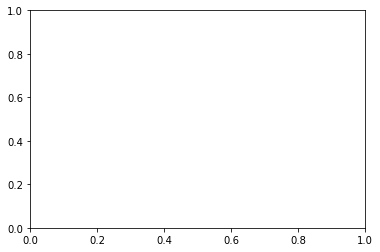

In [157]:
x1 = crime.loc[crime.Province=='Gauteng', dates]
x2 = crime.loc[crime.Province=='Western Cape', dates]


#kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, color='g', bins=100, label='Gauteng')
plt.hist(x2, color='b', bins=100, label='Western Cape')

plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
plt.xlim(50,75)
plt.legend();

<AxesSubplot:xlabel='None,Province'>

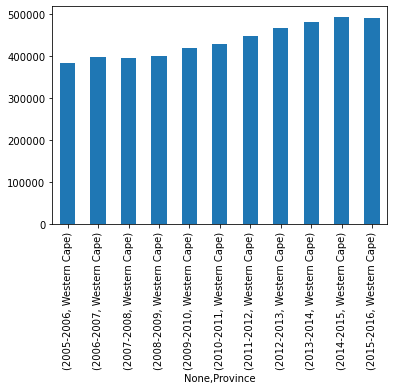

In [83]:
crime.groupby(['Province']).sum().iloc[8:9].unstack().plot(kind='bar')

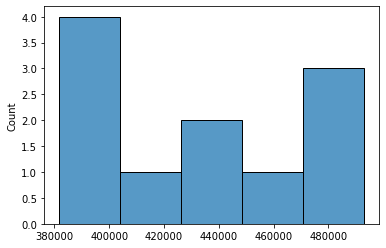

In [29]:
sns.histplot(crime.groupby(['Province']).sum().iloc[8:9].unstack());

In [ ]:
sns.catplot(data=crime, kind)

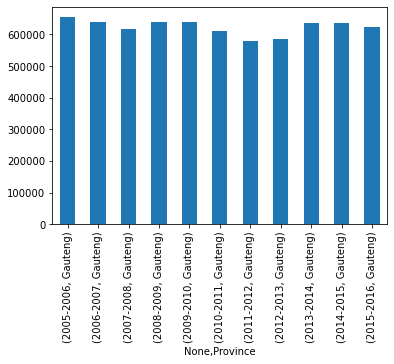

In [92]:

crime.groupby(['Province']).sum().iloc[2:3].unstack().plot(kind='bar');

In [50]:
hist_plot = crime.groupby(['Province']).sum().iloc[2:3]

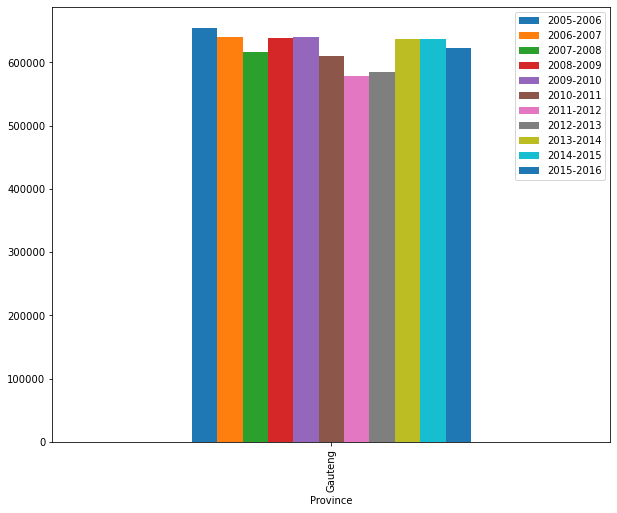

In [66]:
crime.groupby(['Province']).sum().iloc[2:3].plot(kind='bar', figsize=(10,8));

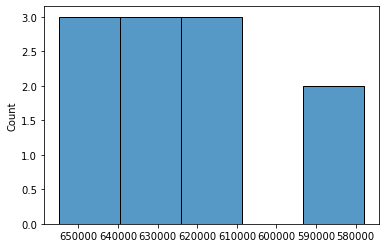

In [96]:
sns.histplot(hist_plot.unstack())
plt.gca().invert_xaxis()

In [5]:
crime.shape

(30861, 14)

In [10]:
crime.isnull().sum()

Province     0
Station      0
Category     0
2005-2006    0
2006-2007    0
2007-2008    0
2008-2009    0
2009-2010    0
2010-2011    0
2011-2012    0
2012-2013    0
2013-2014    0
2014-2015    0
2015-2016    0
dtype: int64

In [11]:
crime.dtypes

Province     object
Station      object
Category     object
2005-2006     int64
2006-2007     int64
2007-2008     int64
2008-2009     int64
2009-2010     int64
2010-2011     int64
2011-2012     int64
2012-2013     int64
2013-2014     int64
2014-2015     int64
2015-2016     int64
dtype: object

In [131]:
crime.groupby(['Province'])['Station'].count()

Province
Eastern Cape     5292
Free State       2970
Gauteng          3861
Kwazulu/Natal    5022
Limpopo          2673
Mpumalanga       2322
North West       2214
Northern Cape    2457
Western Cape     4050
Name: Station, dtype: int64

In [130]:
crime.groupby(['Province'])['Station'].count().sum()

30861

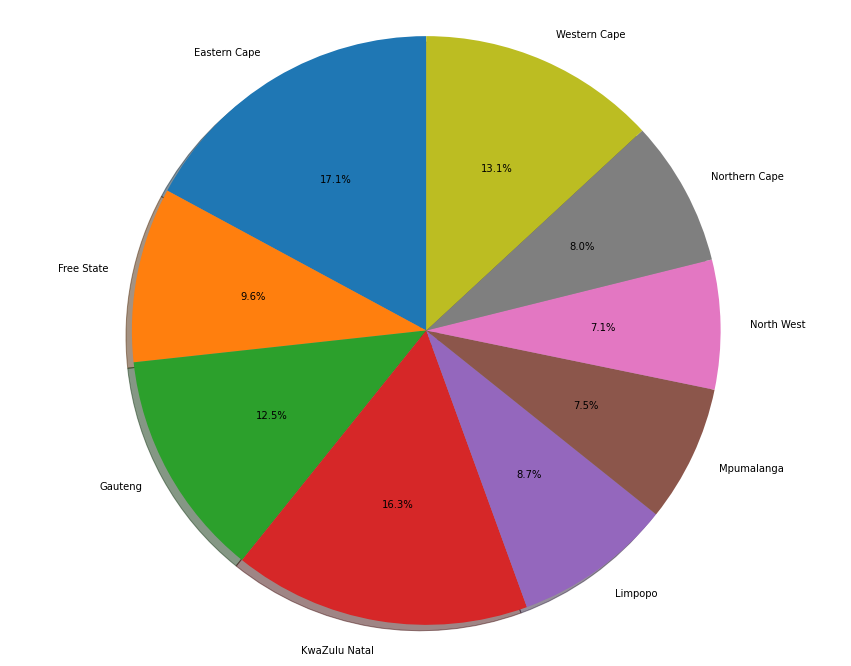

In [136]:
fig1, ax1 = plt.subplots()

frequency = [17.1, 9.6, 12.5, 16.3, 8.7, 7.5, 7.1, 8, 13.1]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 3rd slice (i.e. 'Data Scientist')
label = 'Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu Natal', 'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape'

ax1.pie(x=frequency, 
        explode= explode, 
        labels=label, 
        autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(15, 12)

plt.show()

In [18]:
category = crime.groupby(['Province'])['Category'].value_counts()

In [20]:
category.sample(10)

Province       Category                                               
Kwazulu/Natal  Arson                                                      186
Gauteng        Common robbery                                             143
North West     Bank robbery                                                82
Mpumalanga     Malicious damage to property                                86
North West     Robbery with aggravating circumstances                      82
               Truck hijacking                                             82
Mpumalanga     Robbery at residential premises                             86
North West     Robbery at non-residential premises                         82
Mpumalanga     All theft not mentioned elsewhere                           86
North West     Assault with the intent to inflict grievous bodily harm     82
Name: Category, dtype: int64

In [23]:
crime.groupby(['Category']).sum()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Category,,,,,,,,,,,
All theft not mentioned elsewhere,424690,407714,387554,386858,360120,361222,370916,356847,363517,360541,340372
Arson,7247,7438,6948,6445,6304,6157,5996,5665,5458,5127,4903
Assault with the intent to inflict grievous bodily harm,225659,216754,208705,202328,203807,197470,191612,185050,182333,182556,182933
Attempted murder,20369,19957,18643,18140,17247,15360,14730,16236,16989,17537,18127
Bank robbery,59,130,146,89,81,46,29,4,21,17,6
Burglary at non-residential premises,54217,58240,62756,69829,71544,68907,69902,73492,73464,74358,75008
Burglary at residential premises,261403,248462,236638,245465,255278,246612,244667,261319,259784,253716,250606
Carjacking,12783,13534,14152,14856,13852,10541,9417,9931,11180,12773,14602
Commercial crime,51911,59637,63233,75166,82414,85646,85570,89138,76744,67830,69917


In [116]:
crime['Category'].nunique()

27

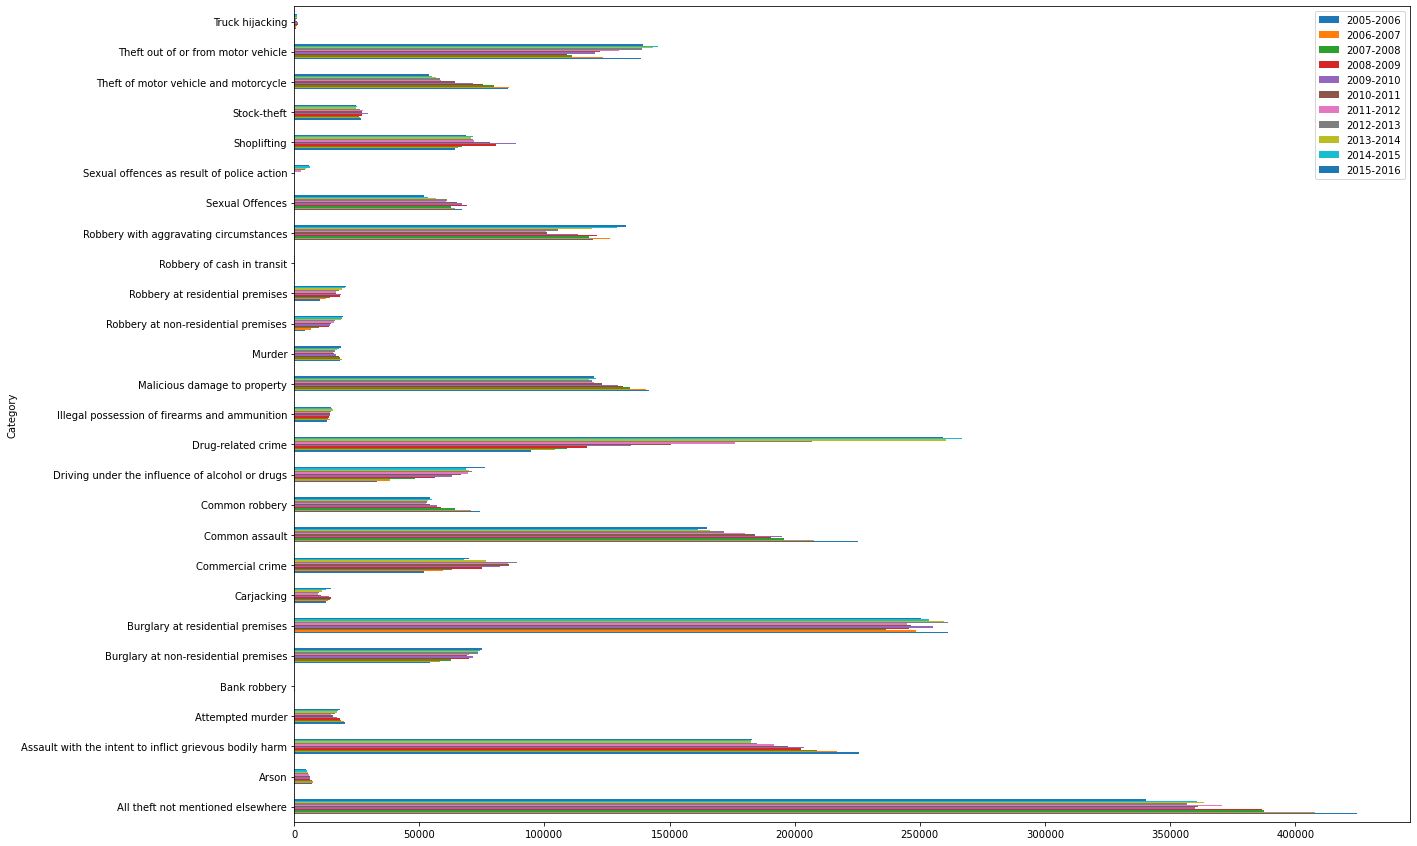

In [68]:
crime.groupby(['Category']).sum().plot(kind='barh', figsize=(20,15));

Text(0.5, 1.0, 'Total crime in South Africa from 2005-2016 per province')

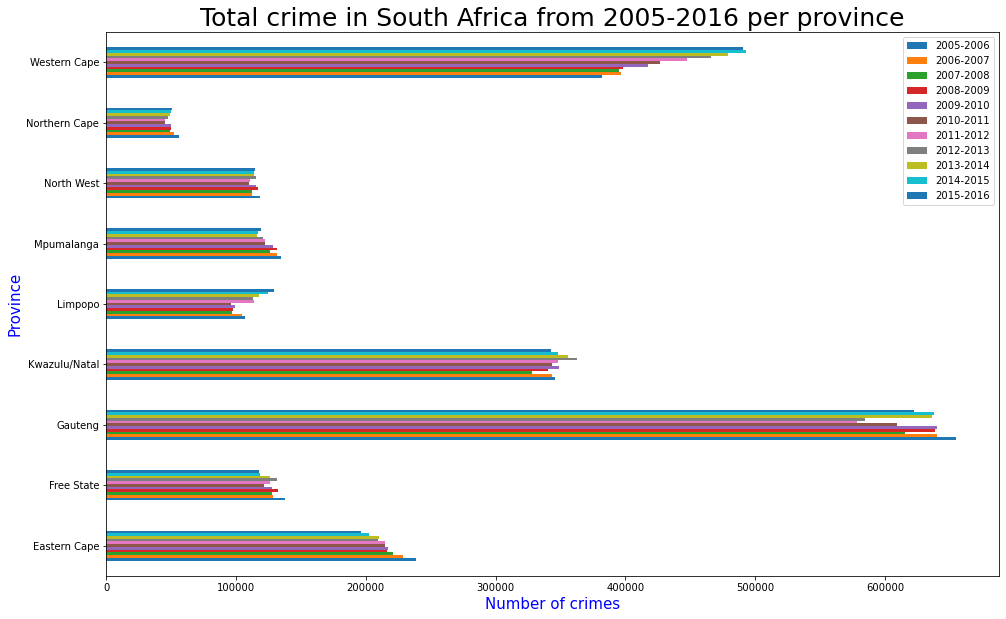

In [25]:
crime.groupby(['Province']).sum().plot(kind='barh', figsize=(16, 10))
plt.xlabel('Number of crimes', color='b', fontsize=15)
plt.ylabel('Province', color='b', fontsize=15)
plt.title('Total crime in South Africa from 2005-2016 per province', fontsize=25)

In [82]:
crime['2015-2016'].sum()

2182999

In [144]:
crime.groupby(['Province'])[crime.columns].sum()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


In [6]:
province_crime_15 = crime.groupby(['Province'])['2015-2016'].sum()
province_crime_14 = crime.groupby(['Province'])['2014-2015'].sum()

In [89]:
crime.groupby(['Province'])['2015-2016'].sum()

Province
Eastern Cape     196089
Free State       117688
Gauteng          622218
Kwazulu/Natal    342772
Limpopo          129323
Mpumalanga       119526
North West       114335
Northern Cape     50665
Western Cape     490383
Name: 2015-2016, dtype: int64

In [143]:
crime.groupby(['Province'])['2015-2016'].sum().sum()

2182999

In [140]:
crime['Province'].count().sum()

30861

In [9]:
province_stations = crime.groupby(['Province'])['Station'].count()
province_stations

Province
Eastern Cape     5292
Free State       2970
Gauteng          3861
Kwazulu/Natal    5022
Limpopo          2673
Mpumalanga       2322
North West       2214
Northern Cape    2457
Western Cape     4050
Name: Station, dtype: int64

In [142]:
crime.groupby(['Province'])['Station'].count().sum()

30861

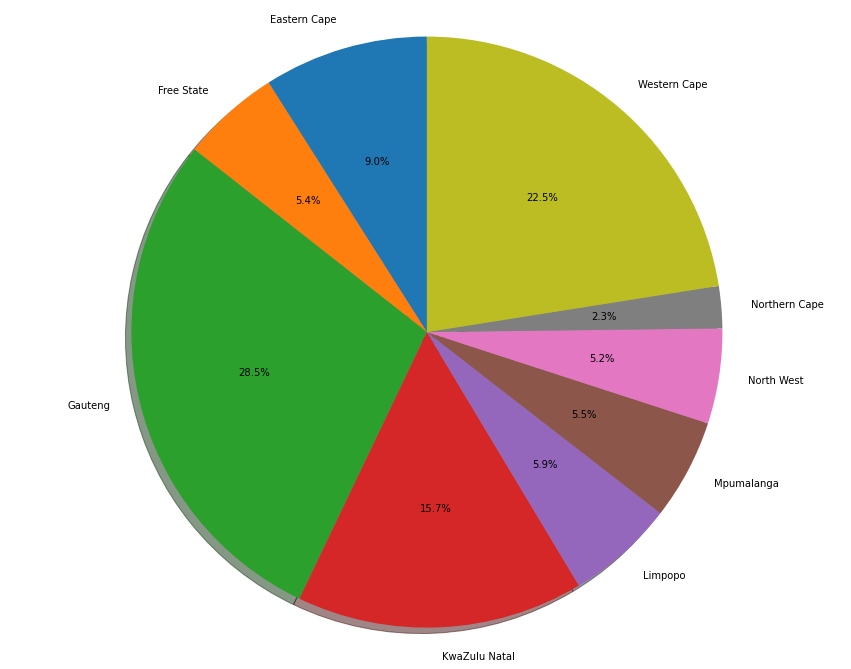

In [144]:
fig1, ax1 = plt.subplots()

frequency = [9, 5.4, 28.5, 15.7, 5.9, 5.5, 5.2, 2.3, 22.5]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 3rd slice (i.e. 'Data Scientist')
label = 'Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu Natal', 'Limpopo', 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape'

ax1.pie(x=frequency, 
        explode= explode, 
        labels=label, 
        autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(15, 12)

plt.show()

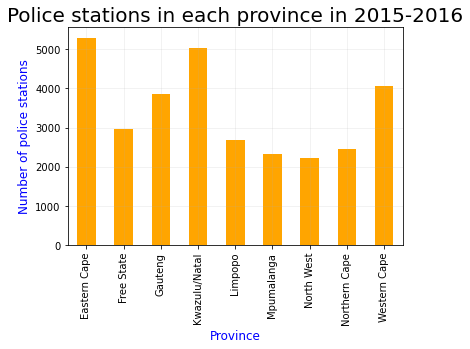

In [106]:
crime.groupby(['Province'])['Station'].count().plot(kind='bar', alpha=1, color='orange')
plt.xlabel('Province', color='b', fontsize=12)
plt.ylabel('Number of police stations', color='b', fontsize=12)
plt.title('Police stations in each province in 2015-2016', fontsize=20)
plt.grid(alpha=0.2)
plt.show;

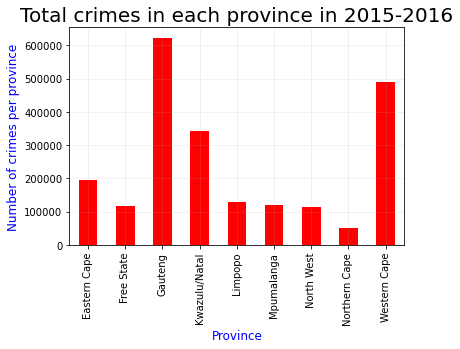

In [105]:
crime.groupby(['Province'])['2015-2016'].sum().plot(kind='bar', alpha=1, color='r')
plt.xlabel('Province', color='b', fontsize=12)
plt.ylabel('Number of crimes per province', color='b', fontsize=12)
plt.title('Total crimes in each province in 2015-2016', fontsize=20)
plt.grid(alpha=0.2)
plt.show;

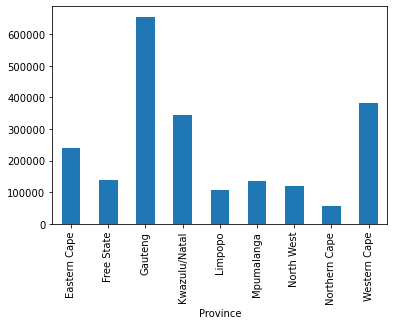

In [162]:
crime.groupby(['Province'])['2005-2006'].sum().plot(kind='bar');

In [4]:
crime.head()

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030


C:\Users\Trader\AppData\Local\Temp/ipykernel_10488/1071147184.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime.groupby(['Province'])['2007-2008', '2011-2012', '2015-2016'].sum().plot(kind='bar');


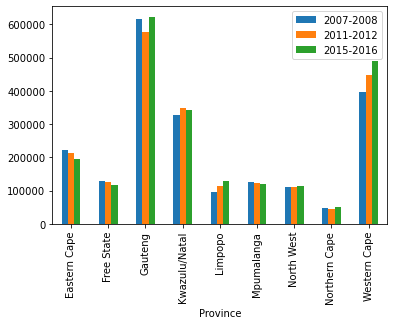

In [133]:
crime.groupby(['Province'])['2007-2008', '2011-2012', '2015-2016'].sum().plot(kind='bar');

C:\Users\Trader\AppData\Local\Temp/ipykernel_5228/3550649138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crime.groupby(['Province'])['2005-2006', '2007-2008', '2009-2010', '2011-2012', '2013-2014', '2015-2016'].sum().plot(kind='bar');


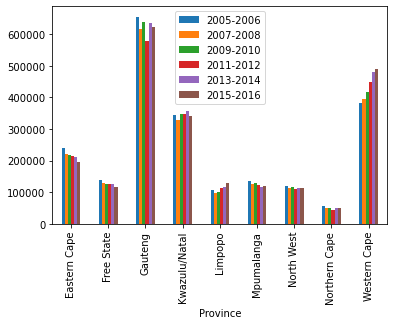

In [118]:
crime.groupby(['Province'])['2005-2006', '2007-2008', '2009-2010', '2011-2012', '2013-2014', '2015-2016'].sum().plot(kind='bar');

In [97]:
crime.groupby(['Province'])[crime.columns].sum()

,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
Province,,,,,,,,,,,
Eastern Cape,238977,228884,220813,216658,217230,215012,214462,209124,210248,202582,196089
Free State,137987,128227,127955,132335,127512,121997,126389,131785,126290,118879,117688
Gauteng,654817,639635,615618,638186,640074,609305,577959,584315,636195,637332,622218
Kwazulu/Natal,345784,343798,328368,340095,349103,343767,348411,362677,355729,348394,342772
Limpopo,106983,104857,97166,97565,99610,96475,113630,112952,117638,124986,129323
Mpumalanga,134829,131444,125954,131410,128814,122402,122186,121169,115996,117203,119526
North West,118840,112471,112340,117118,115680,109922,111028,115319,113935,114270,114335
Northern Cape,56515,52689,48954,50277,49746,45618,45257,47697,48947,49897,50665
Western Cape,381825,396712,395281,398240,417619,426850,447238,465994,479022,492963,490383


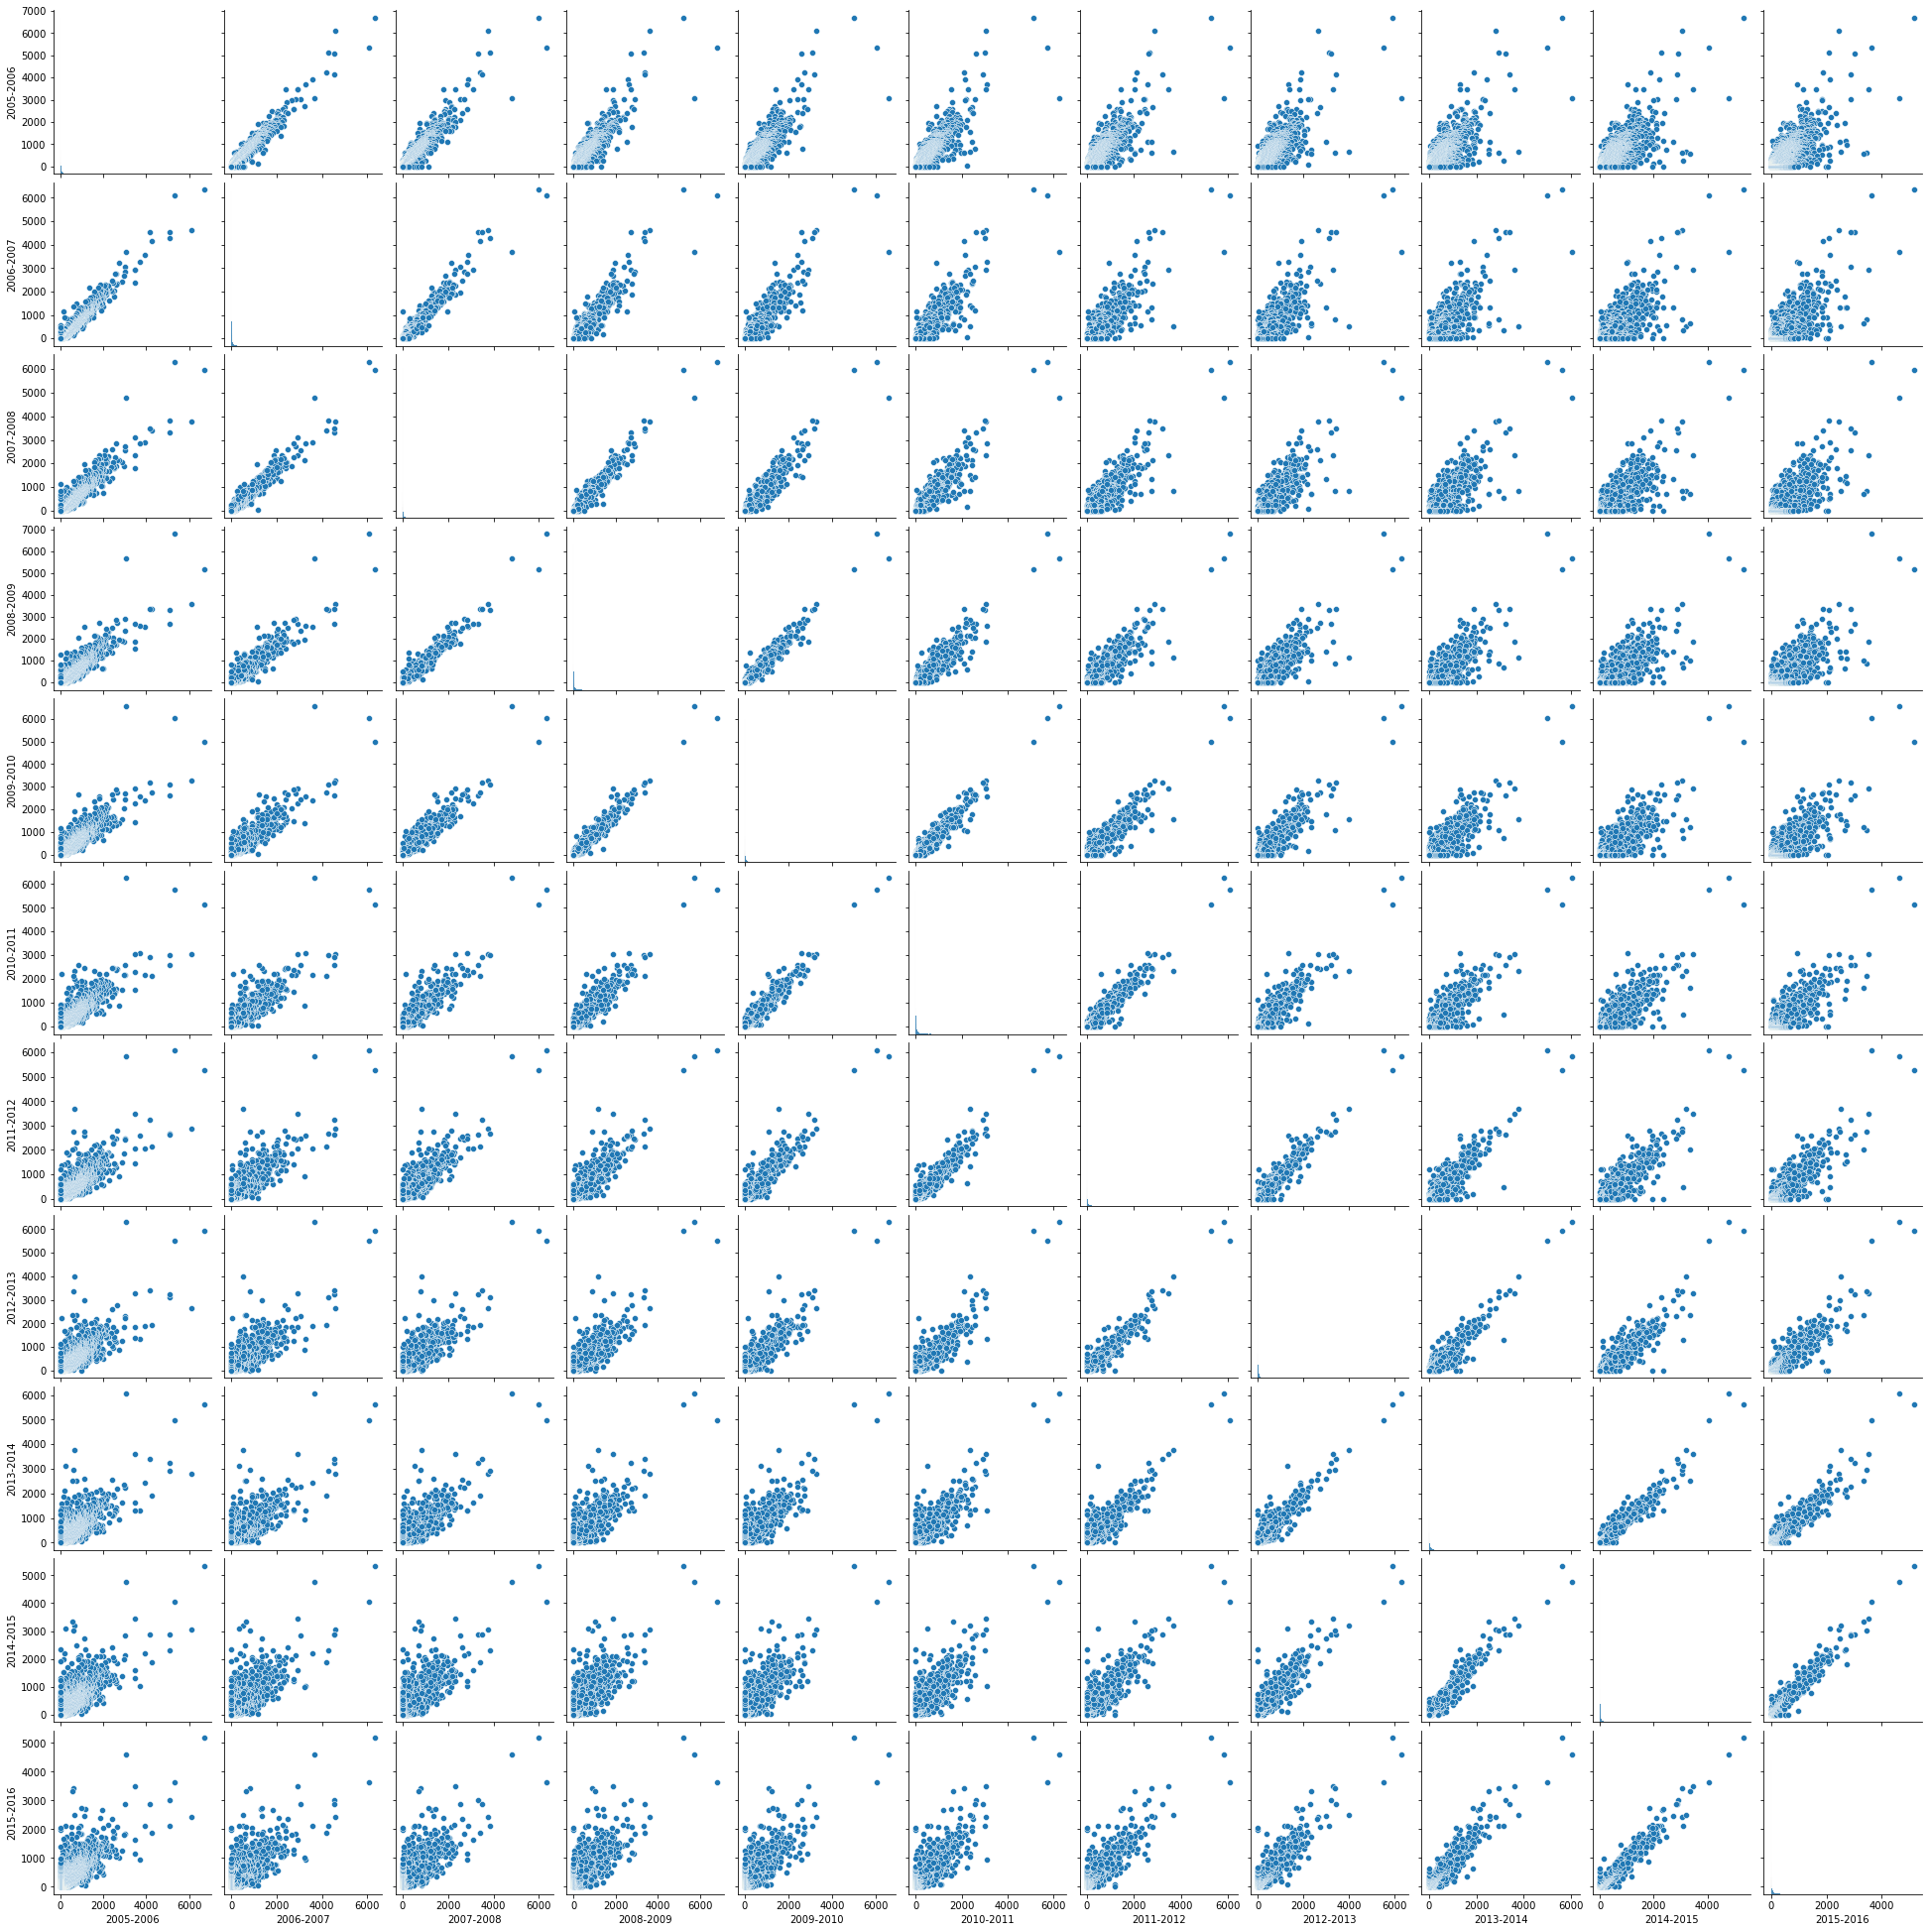

In [122]:
sns.pairplot(crime)

In [16]:
t2, p2 = stats.ttest_ind(province_crime_15, province_stations)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.6176198367950025
p = 0.0023115471007856543
